## （一）kaggle網站上的 House Prediction 的競賽
- 比賽分數：0.15671 排名：2663

![](https://i.imgur.com/YM0C8O2.png)

In [22]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)




In [23]:
df = pd.read_csv('HW2_house-prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- 分別對數字類型以及字串類型資料填補缺失值
- 利用factorize encode字串類型的資料


In [24]:
import pandas as pd
df = df.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)
num_df = df.select_dtypes(include='number')
num_cols = num_df.columns

for col in num_cols:
    df[col]=df[col].fillna(df[col].median())


str_df = df.select_dtypes(include='object')
str_cols=str_df.columns

for col in str_cols:
    df[col]=df[col].fillna(df['LotShape'].value_counts().idxmax())
for col in str_cols:
    df[col]=pd.factorize(df[col])[0]

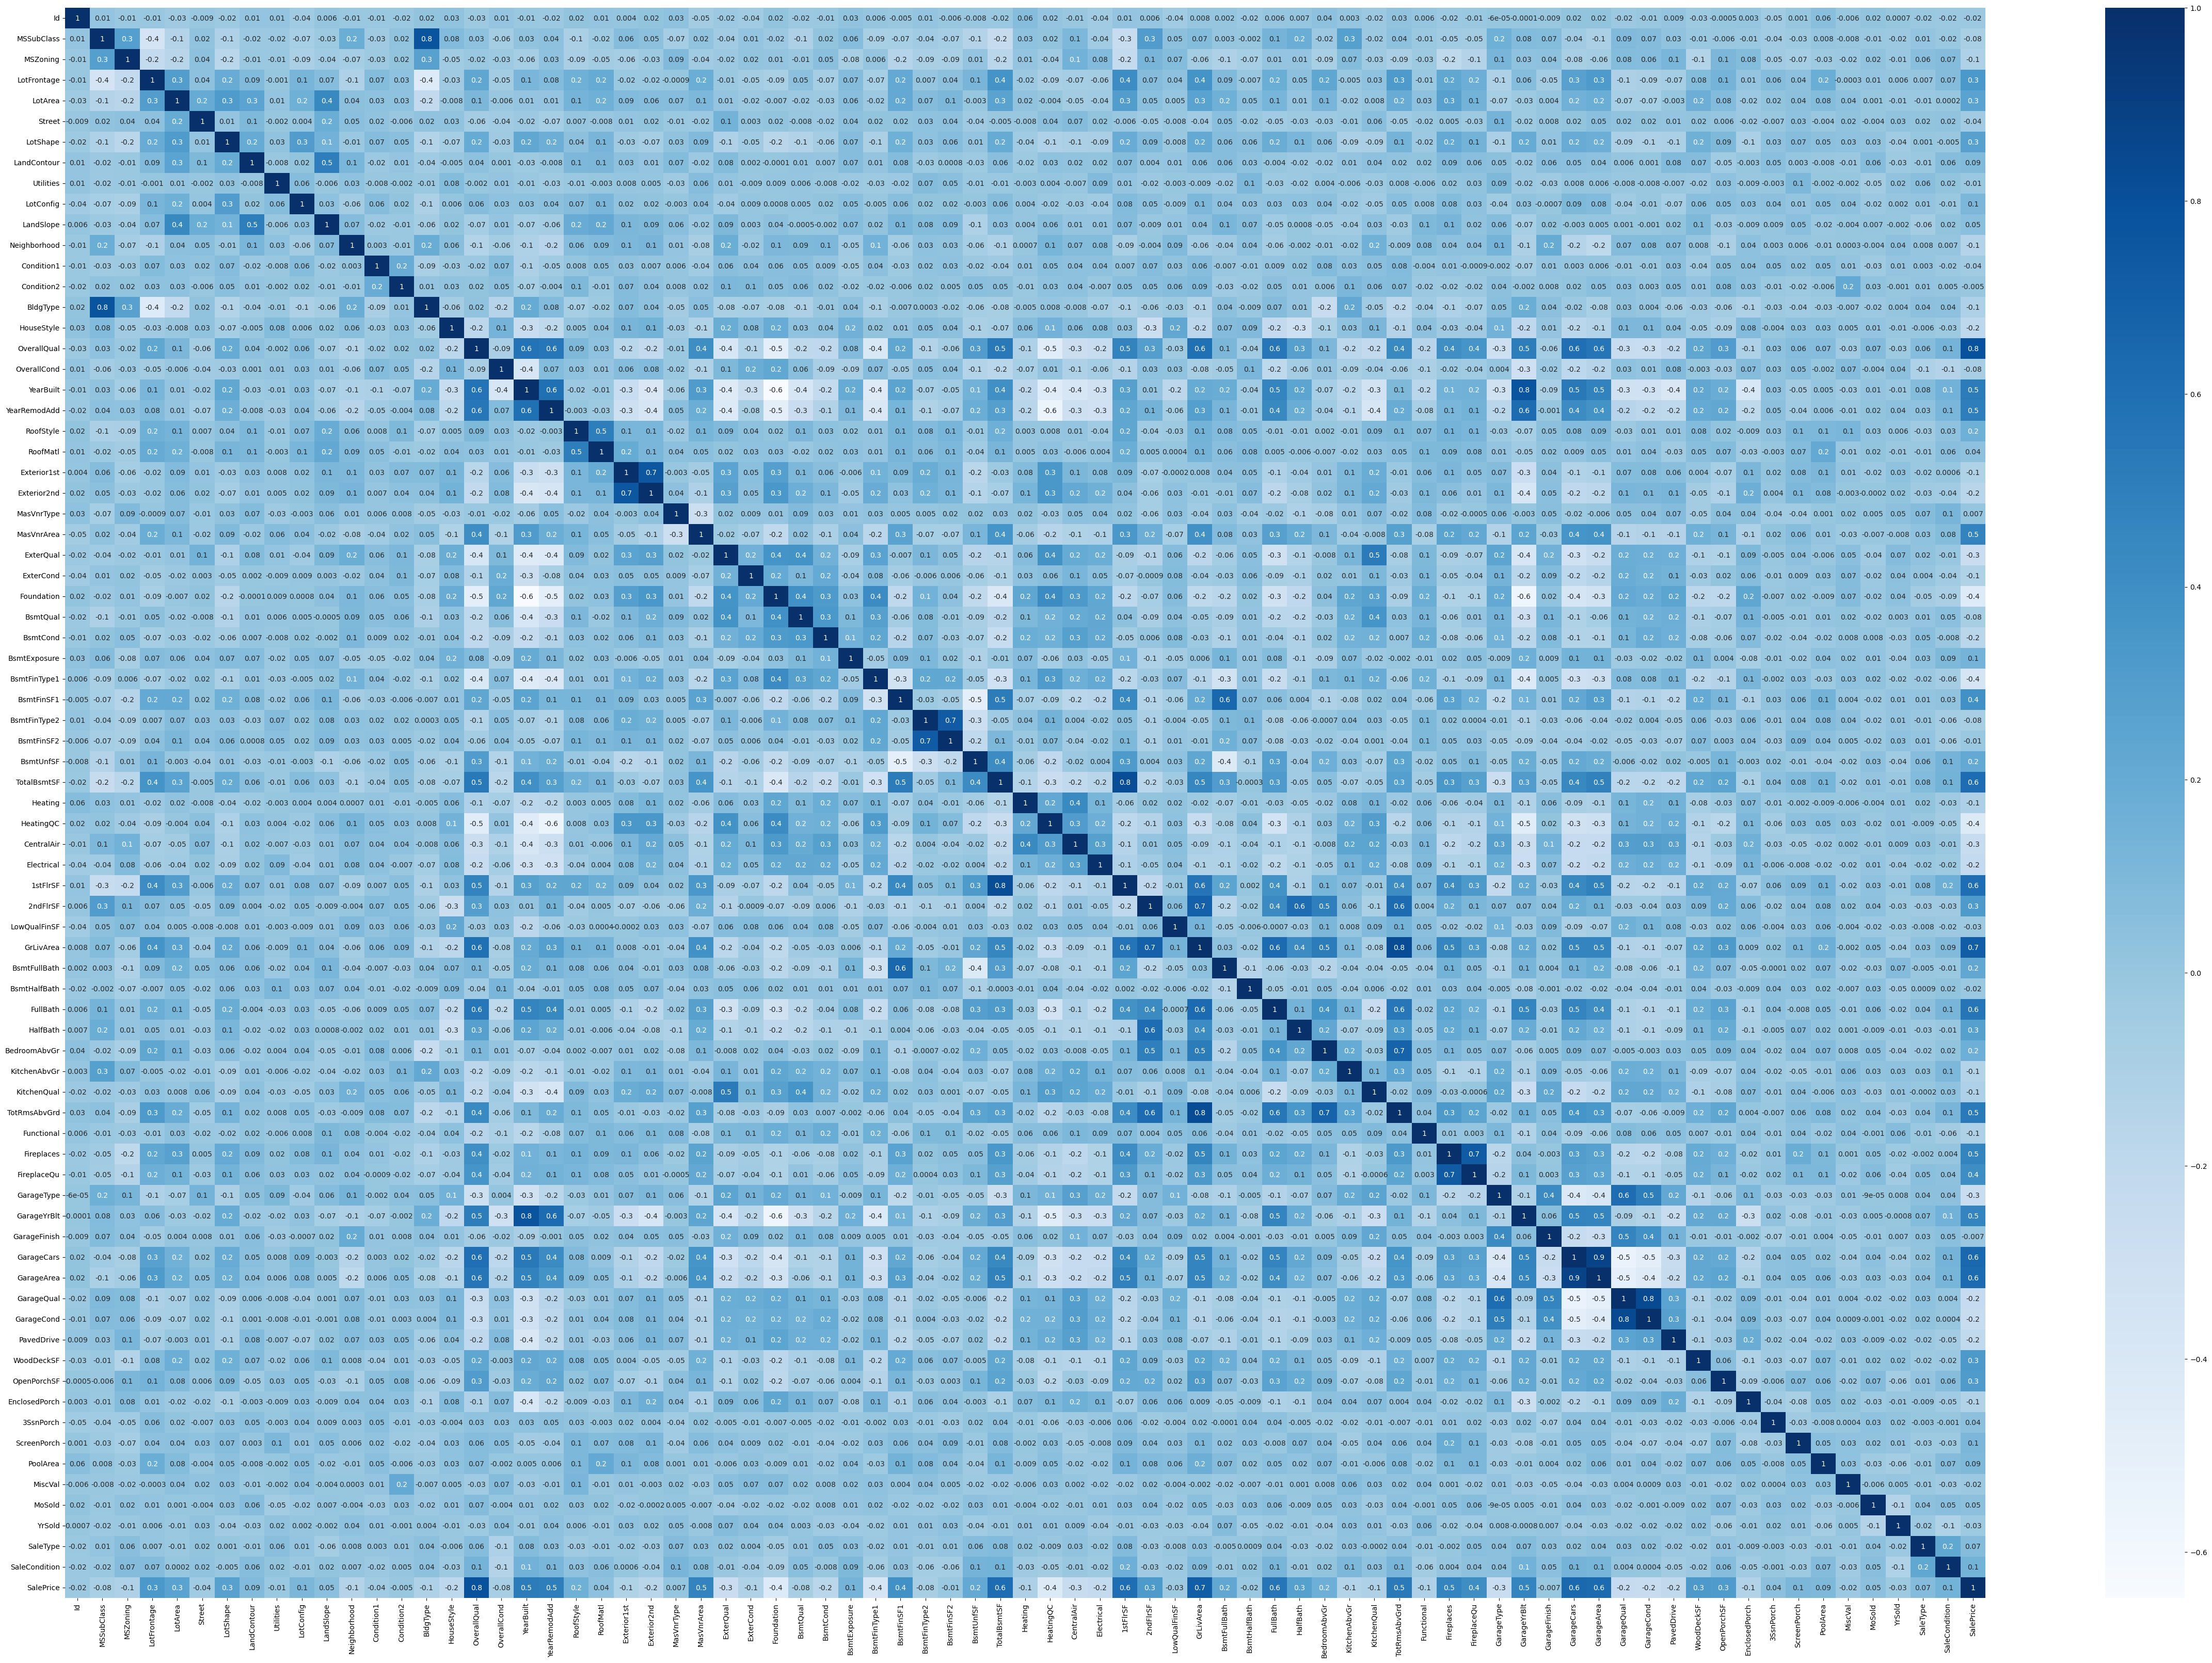

In [25]:
plt.figure(figsize=(60,40))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues',fmt='.1g')
plt.show()

- 挑選相關係數較高的feature並進行一系列的視覺化分析

In [26]:
p_df = df[['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']]

- pairplot 可以讓我們了解每個特徵之間的關係
- 對角線上呈現單獨變數的分佈
- 非對角線上呈現與其他變數之間的關係
- 按照 'OverallQual' 類別區分不同顏色去劃分

<Figure size 2000x1500 with 0 Axes>

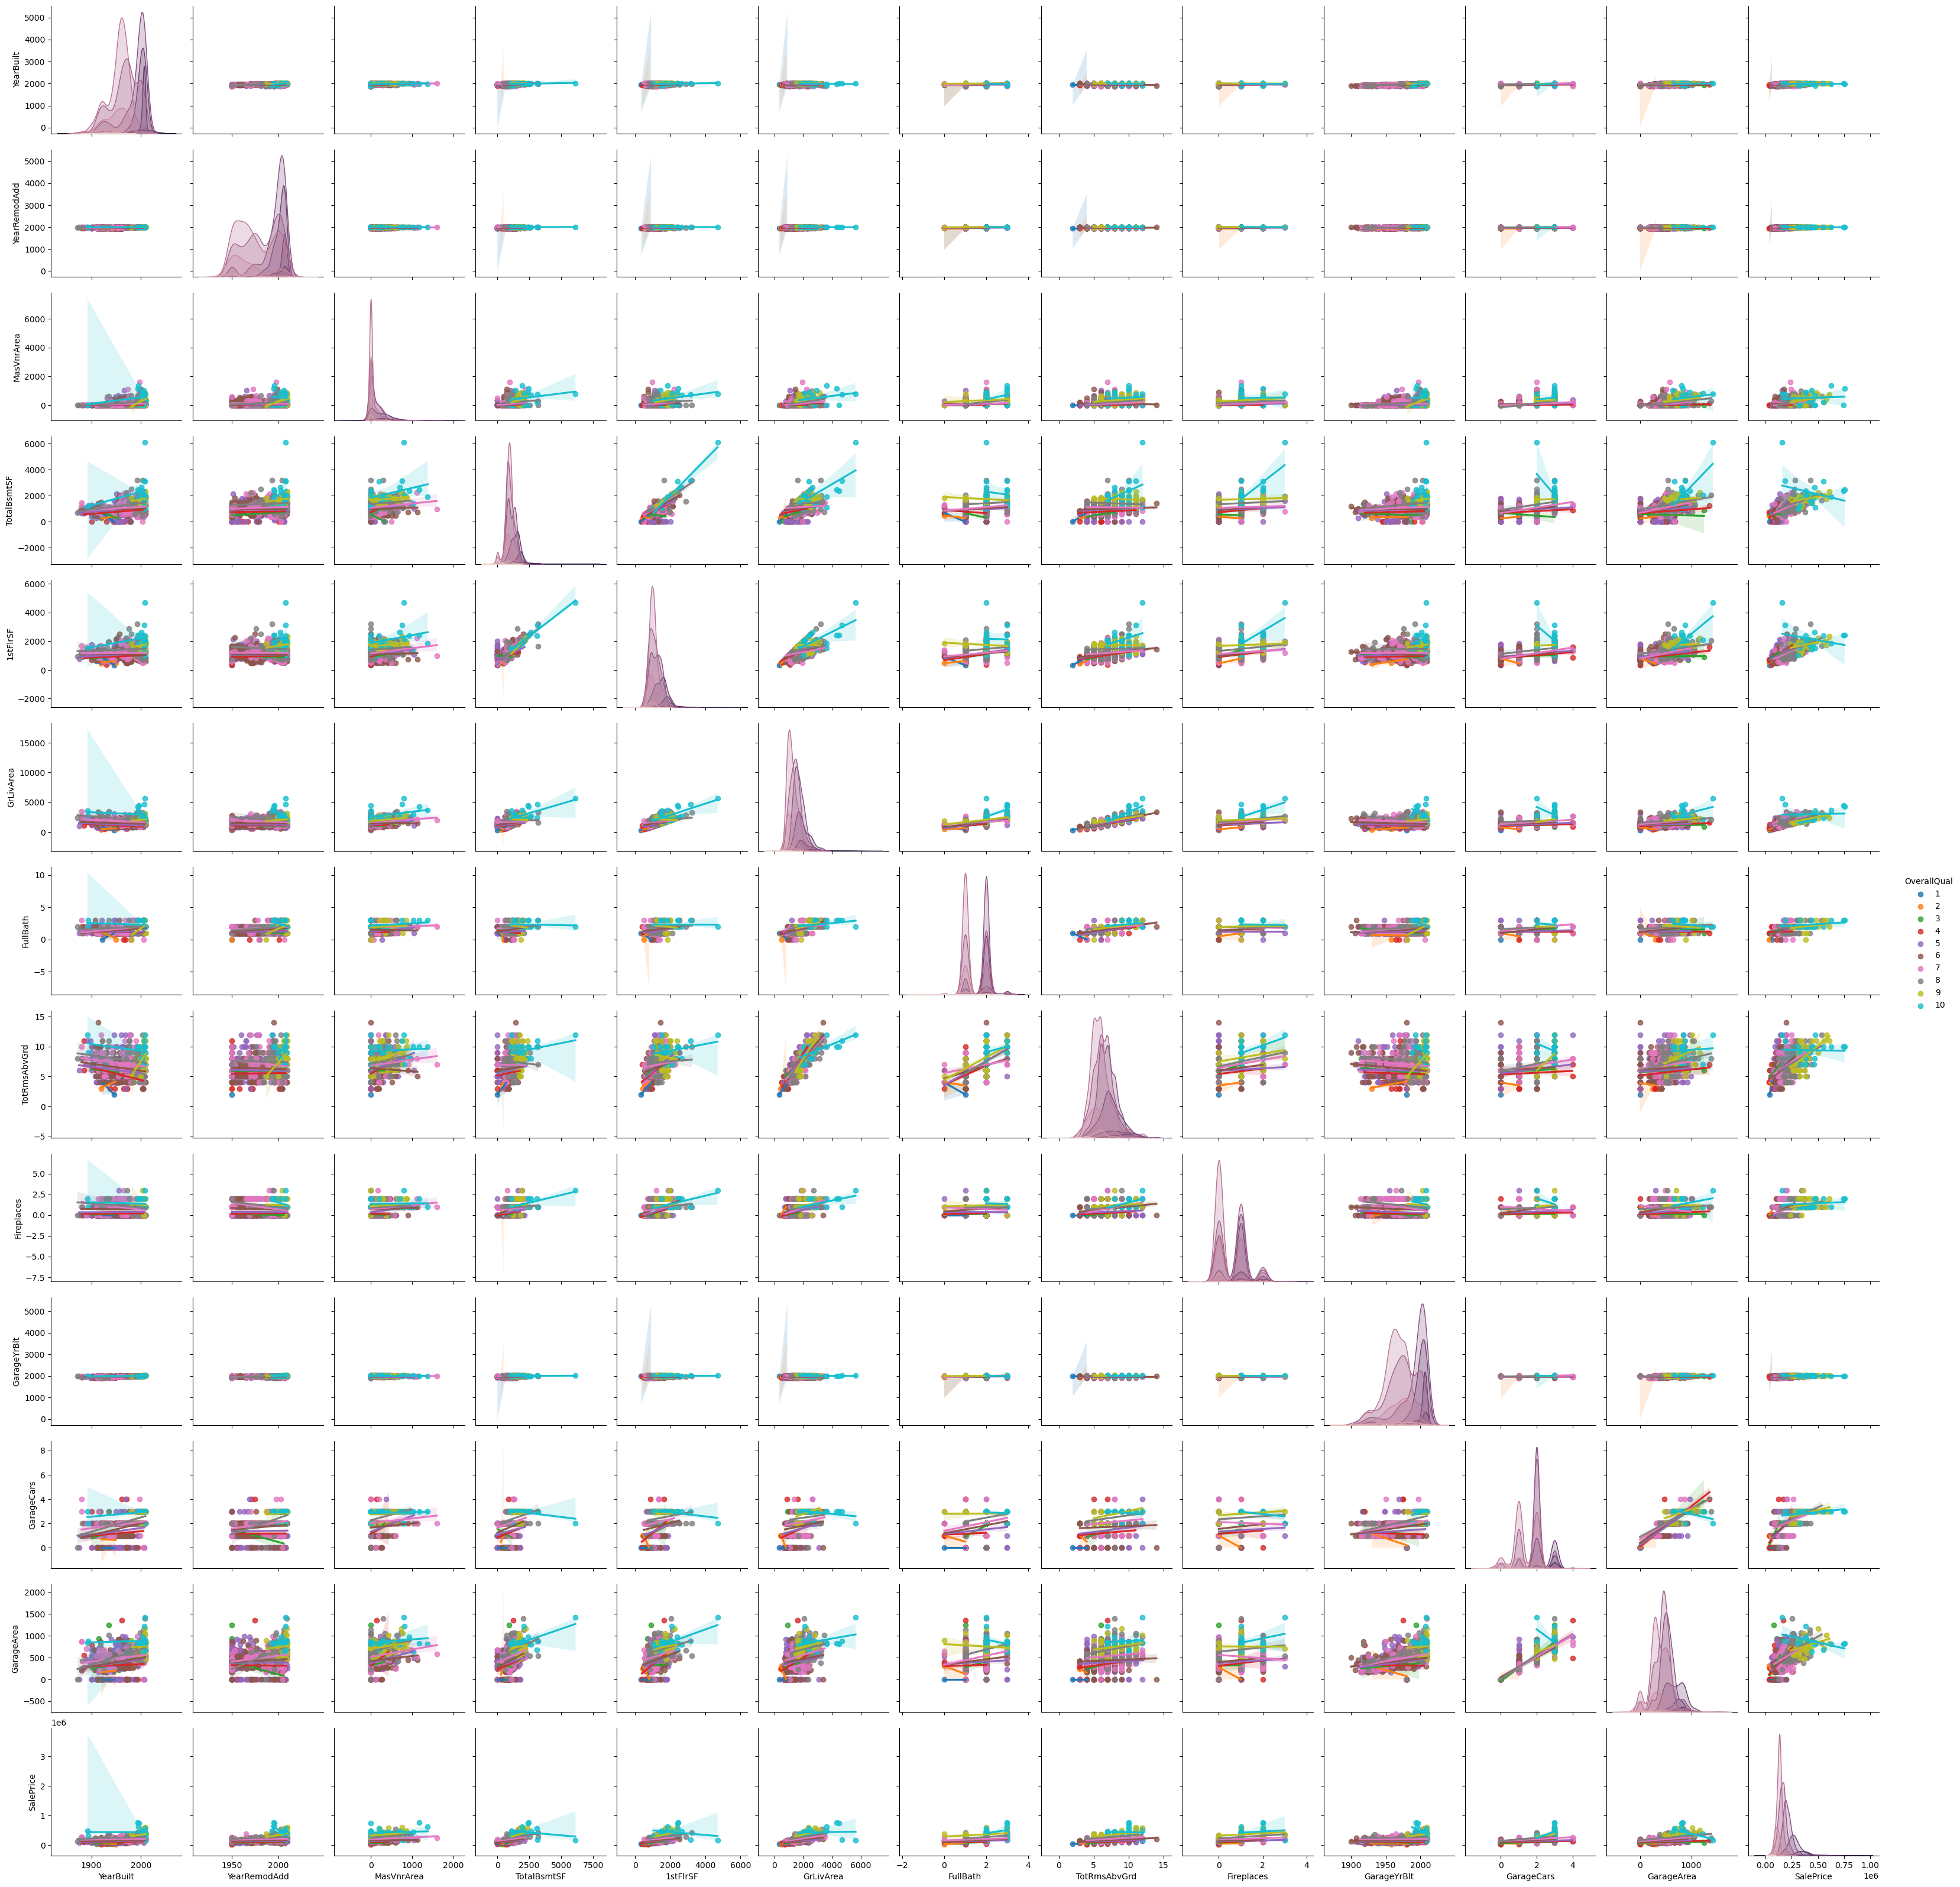

In [31]:
plt.figure(figsize=(20,15))
sns.pairplot(data=p_df,diag_kind='kde',hue='OverallQual',kind='reg')
plt.show()

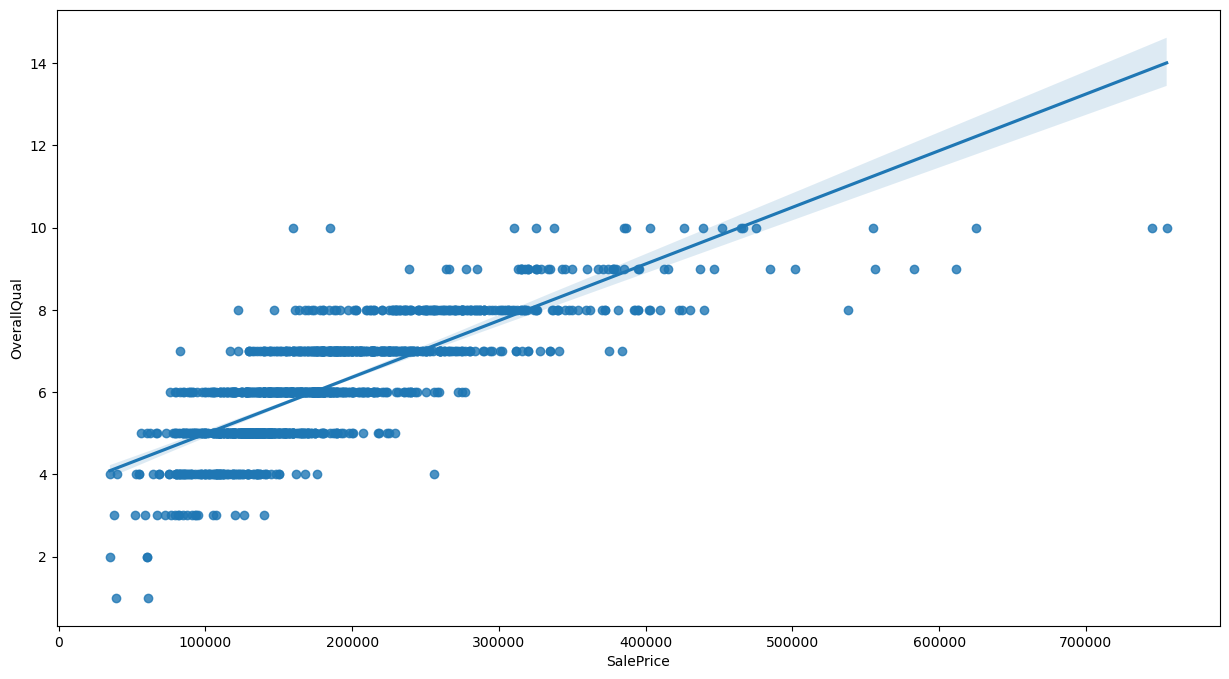

In [27]:
plt.figure(figsize=(15,8))
sns.regplot(data=p_df,x='SalePrice',y='OverallQual')
plt.show()

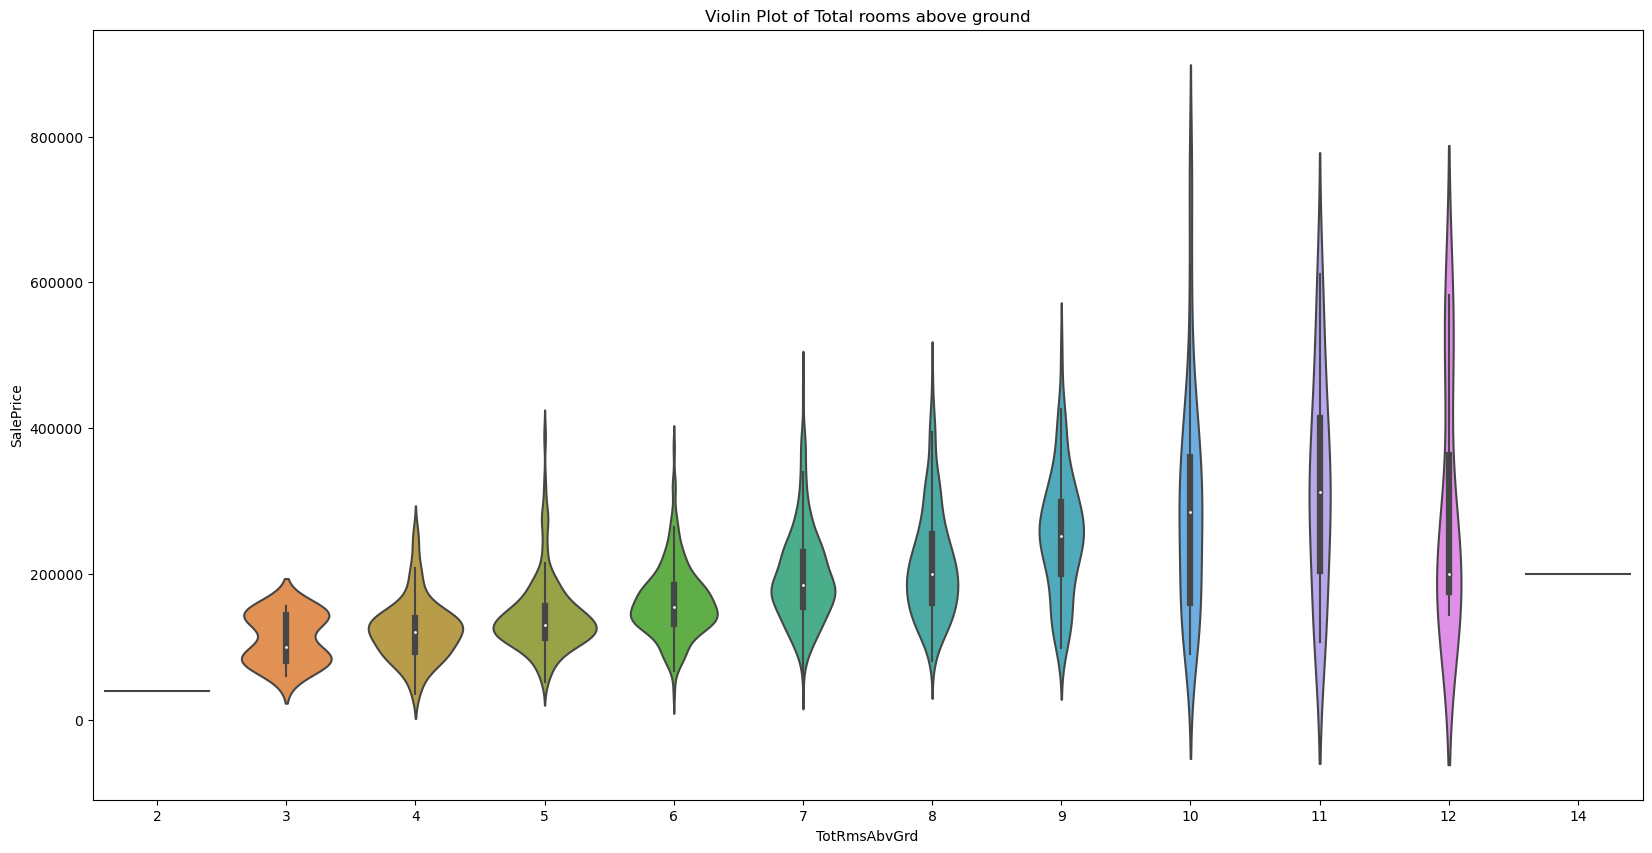

In [28]:
plt.figure(figsize=(20,10))
sns.violinplot(data=p_df,x='TotRmsAbvGrd',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

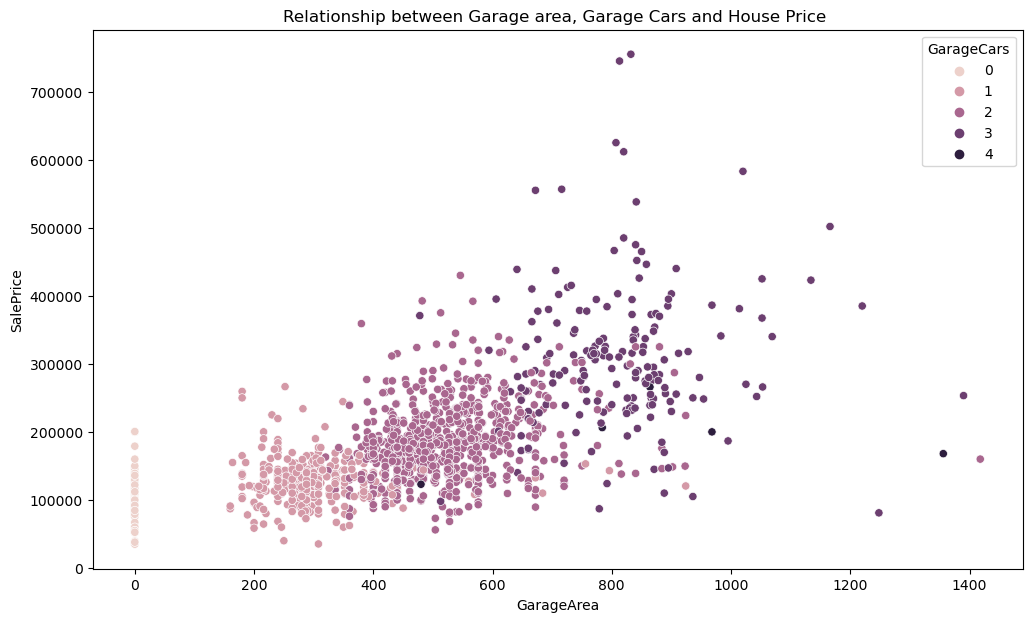

In [36]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=p_df,x='GarageArea',y='SalePrice',hue='GarageCars')
plt.title('Relationship between Garage area, Garage Cars and House Price ')
plt.show()

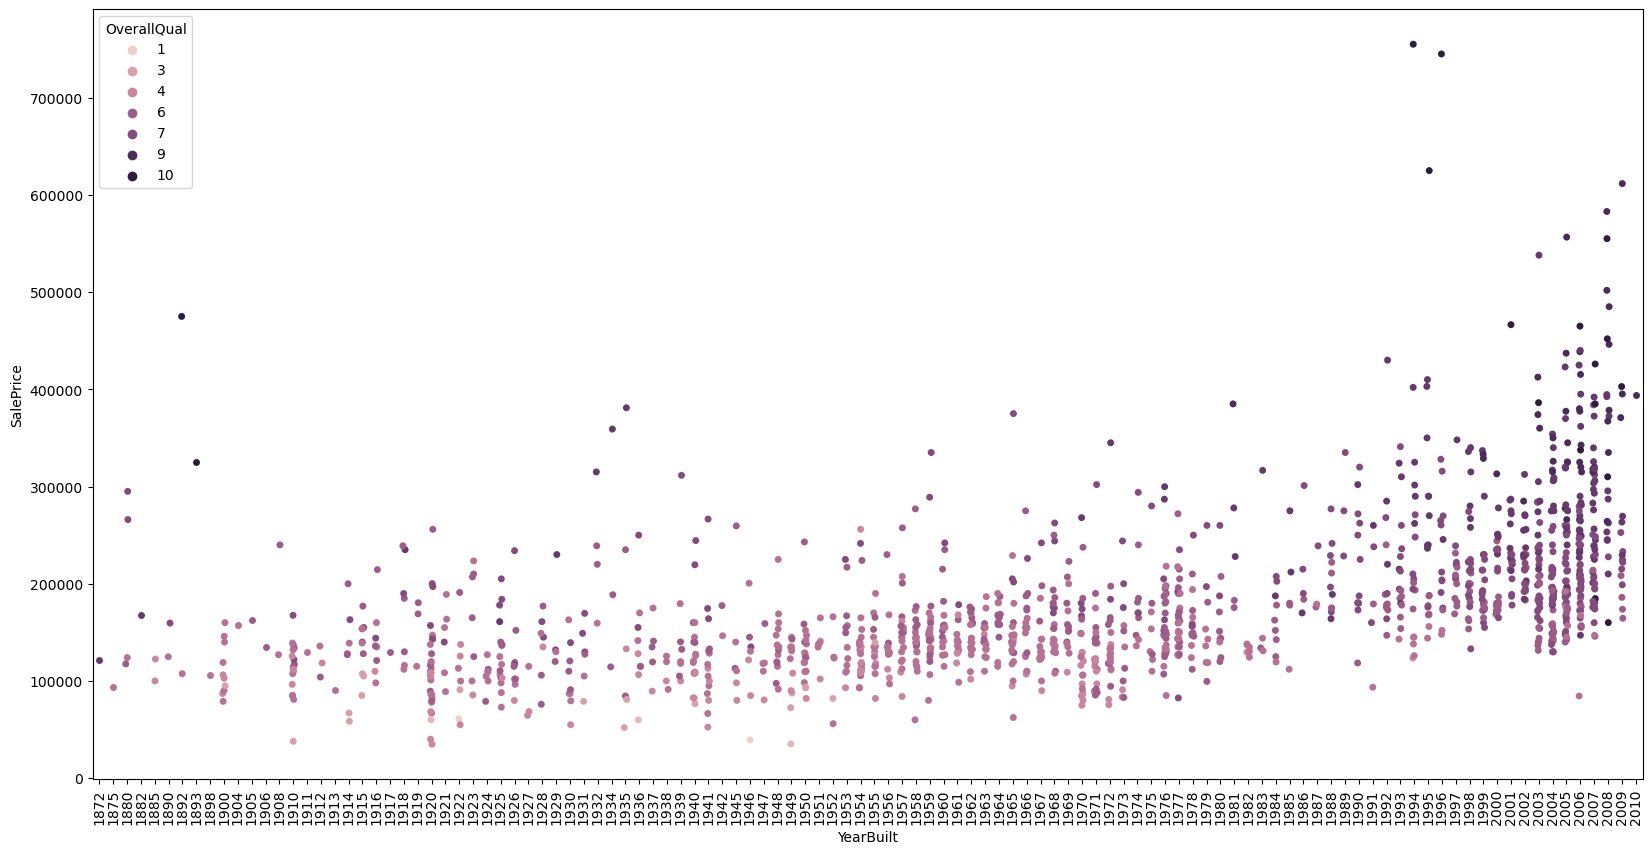

In [37]:
plt.figure(figsize=(20,10))
sns.stripplot(data=p_df,x='YearBuilt',y='SalePrice',hue='OverallQual')
plt.xticks(rotation=90)
plt.show()

In [50]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
X_train = p_df.drop('SalePrice',axis=1)

y = p_df['SalePrice']

model = XGBRegressor(n_estimators=1500,learning_rate=0.1)
# model = GradientBoostingRegressor(n_estimators=1500)
#model =   RandomForestRegressor(n_estimators=1500)


model.fit(X_train,y)
pred = model.predict(X_train)
mape = mean_absolute_percentage_error(y,pred)
r2 = r2_score(y,pred)
print(mape,r2)


0.0005695123521067802 0.9999355525765863


In [51]:
test_df = pd.read_csv('test.csv')

test_df = test_df.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)
num_df = test_df.select_dtypes(include='number')
num_cols = num_df.columns

for col in num_cols:
    test_df[col]=test_df[col].fillna(test_df[col].median())


str_df = test_df.select_dtypes(include='object')
str_cols=str_df.columns

for col in str_cols:
    test_df[col]=test_df[col].fillna(test_df['LotShape'].value_counts().idxmax())
for col in str_cols:
    test_df[col]=pd.factorize(test_df[col])[0]


In [52]:
test_feature = test_df[['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']]
test_pred = model.predict(test_feature)

test_pred = pd.DataFrame({"Id":list(test_df['Id']),"SalePrice":test_pred})

test_pred.to_csv('submission.csv',index=False)

- 只挑選5個feature

In [48]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
five_feature = df[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]
five_y = df['SalePrice']

model5 = XGBRegressor(n_estimators=1500,learning_rate=0.1)
#model5 = GradientBoostingRegressor(n_estimators=1500)
#model5 =   RandomForestRegressor(n_estimators=1500)


model5.fit(five_feature, five_y)
five_pred = model5.predict(five_feature)
mape = mean_absolute_percentage_error(five_y, five_pred)
r2=r2_score(five_y, five_pred)
print(mape,r2)


0.0030419041201377806 0.999621312046889


In [49]:
import pandas as pd
test_f2 = test_df[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]
test_pred2 = model5.predict(test_f2)
test_pred2 = pd.DataFrame({"Id":list(test_df['Id']),"SalePrice":test_pred2})
test_pred2.to_csv('submission.csv',index=False)

- 只挑選5個特徵與不限制特徵使用數量時的預測結果比較
- 模型在測試集上預測的指標按照 kaggle 上的 Root Mean Square Error 計算

|                         |不限制特徵使用數量|5個特徵|  
|-------------------------|----------------|-------|
|XGBoostRegressor         |    0.1599      |0.1839 |
|RandomForestRegressor    |    0.1578      |0.1744 |
|GradientBoostingRegressor|    0.1698      |0.1891 |


## （二） 使用Linear Regression 預測在不同的時間，租借共享單車的人數預測

In [7]:
import pandas as pd

# 讀取帶有日期的數據 將日期轉為pandas的datetime資料形態
def preprocess(df):
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

    # 按日期進行排序
    df.sort_values(by='datetime', ascending=True, inplace=True)
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute  
    df['second'] = df['datetime'].dt.second  
    df.drop(['datetime','minute','second'], axis=1, inplace=True)
    return df

train = pd.read_csv('HW2_bike-sharing_train.csv')
train = preprocess(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 8385
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8386 non-null   int64  
 1   holiday     8386 non-null   int64  
 2   workingday  8386 non-null   int64  
 3   weather     8386 non-null   int64  
 4   temp        8386 non-null   float64
 5   atemp       8386 non-null   float64
 6   humidity    8386 non-null   int64  
 7   windspeed   8386 non-null   float64
 8   count       8386 non-null   int64  
 9   year        8386 non-null   int64  
 10  month       8386 non-null   int64  
 11  day         8386 non-null   int64  
 12  hour        8386 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 917.2 KB


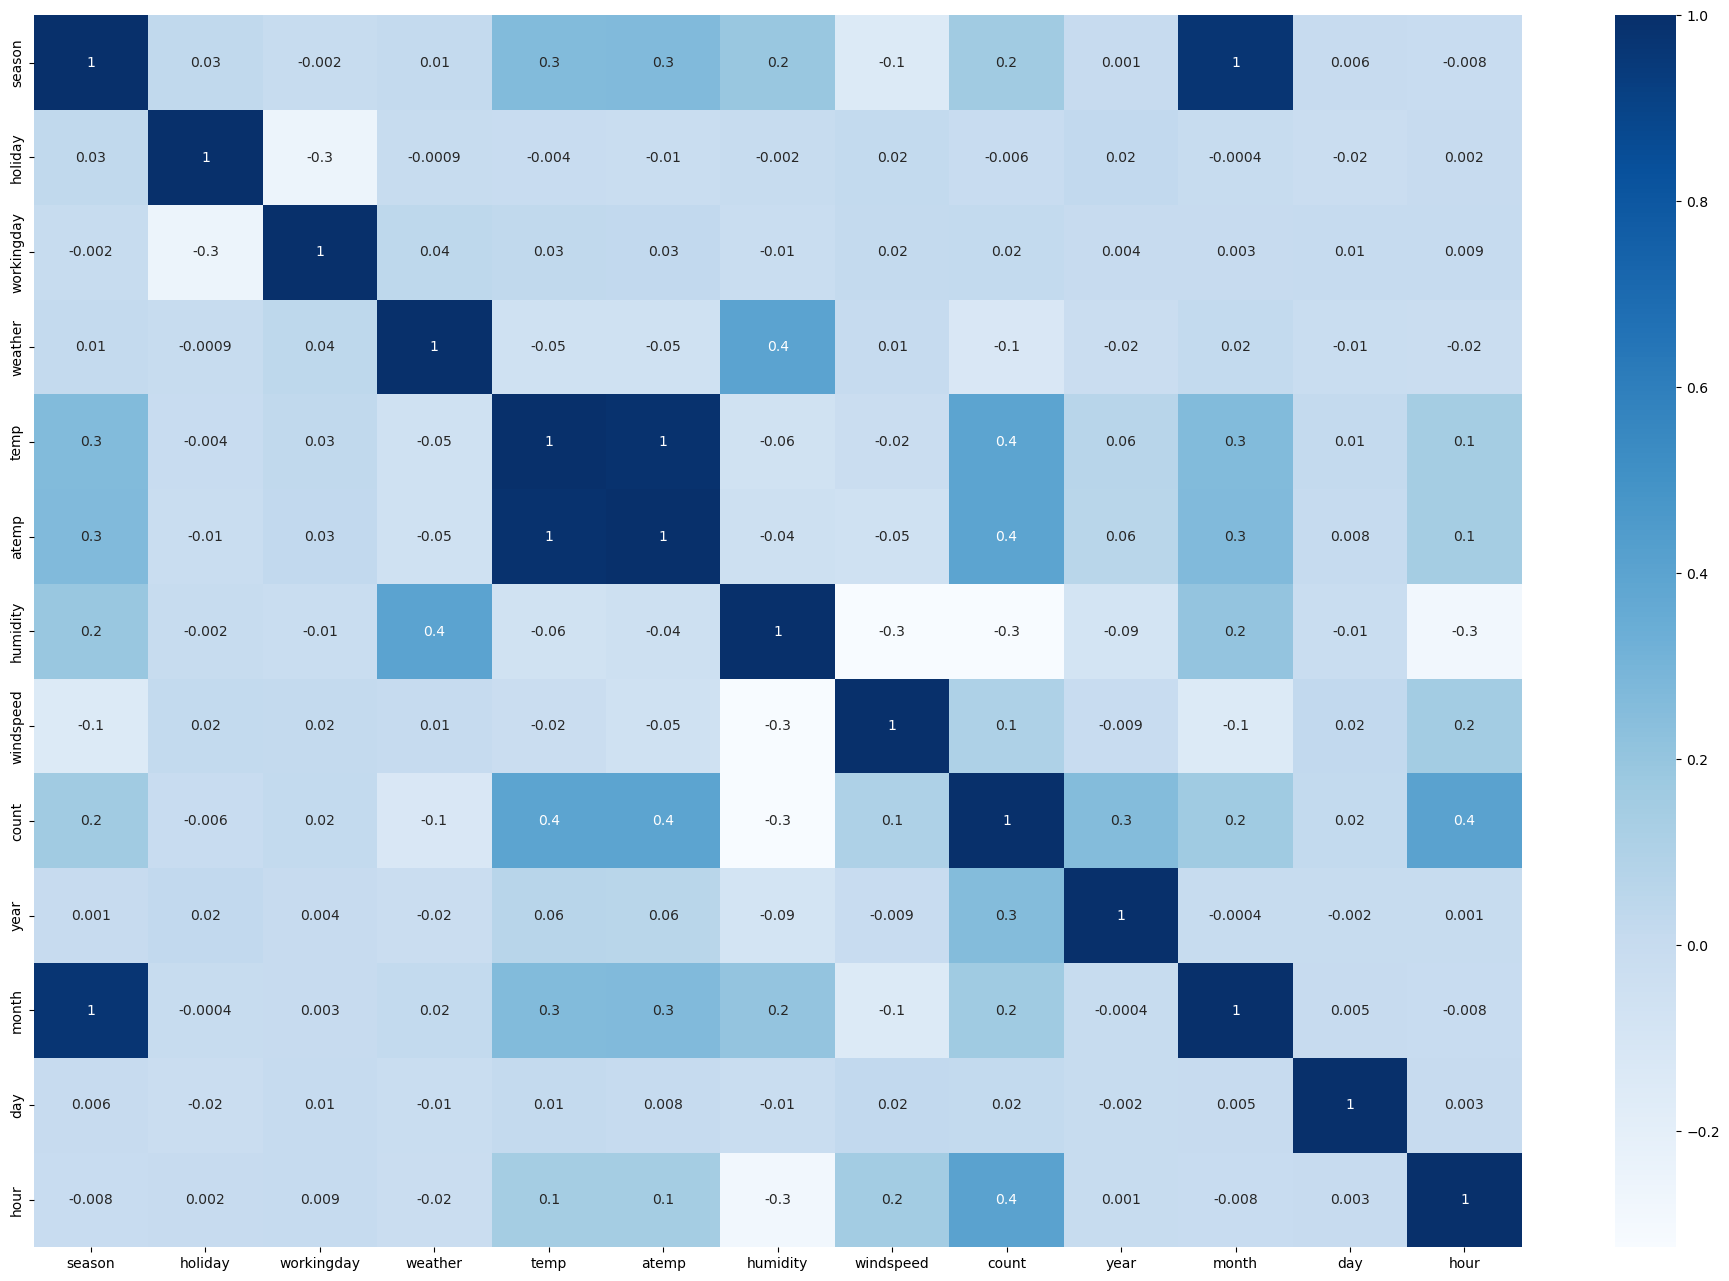

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24,16))
sns.heatmap(data=train.corr(),annot=True,cmap='Blues',fmt='.1g')
plt.show()

- 可以看出 count 跟 day 沒什麼關係 month 跟season高度相關 所以只取一個
- workingday 與 holiday 我們想畫一下圖了解趨勢之後再判斷要不要加進feature
- 溫差可能會影響租借單車人數

In [9]:
X_train = train[['holiday', 'workingday', 'weather', 'temp','atemp','humidity', 'windspeed','year','month','hour', 'count' ]]
X_train['temp_diff'] = X_train['atemp'] - X_train['temp'] 

C:\Users\Terry\AppData\Local\Temp\ipykernel_9700\2656004138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['temp_diff'] = X_train['atemp'] - X_train['temp']


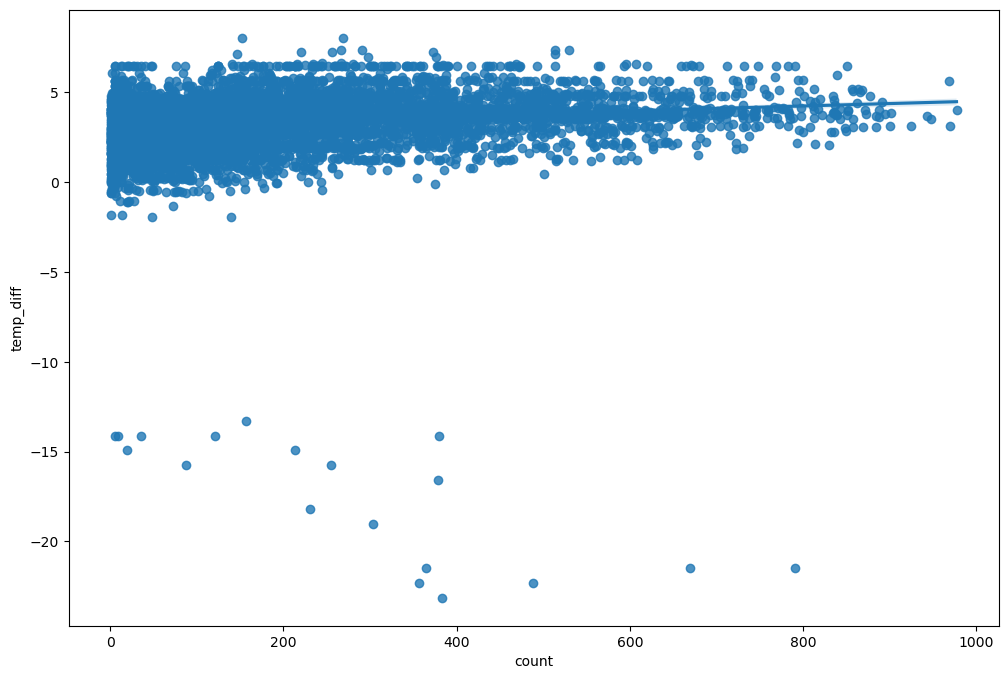

In [10]:
plt.figure(figsize=(12,8))
sns.regplot(data=X_train, x='count', y='temp_diff')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score


X_train = X_train.drop(['count'],axis=1)
y_train = train['count']

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler,columns = X_train.columns)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as n

linear_model = LinearRegression()

linear_model.fit(X_train_scaler, y_train)

li_pred = linear_model.predict(X_train_scaler)
mse = mean_squared_error(y_train, li_pred)
r2 = r2_score(y_train, li_pred)
print("linear_model:",mse,r2)


model = XGBRegressor(n_estimators=300)

model.fit(X_train_scaler, y_train)
xg_pred = model.predict(X_train_scaler)
mse = mean_squared_error(y_train, xg_pred)
r2 = r2_score(y_train, xg_pred)
print("xg:",mse,r2)



linear_model: 19758.15496915766 0.3952254024315375
xg: 225.23946016099373 0.9931056769173012


In [21]:
bike_test = pd.read_csv('HW2_bike-sharing_test.csv')

X_test = preprocess(bike_test)

X_test = X_test[['holiday', 'workingday', 'weather', 'temp','atemp','humidity', 'windspeed','year','month','hour']]
X_test['temp_diff'] = X_test['atemp'] - X_test['temp'] 

X_test_scaler = scaler.transform(X_test)
bike_pred = model.predict(X_test_scaler)

bike_pred = pd.DataFrame({"count":bike_pred})
bike_pred.to_csv('HW2_bike-sharing_test_sol.csv',index=False)


C:\Users\Terry\AppData\Local\Temp\ipykernel_9700\1651856216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['temp_diff'] = X_test['atemp'] - X_test['temp']


## (三) 針對員工離職率進行離職與否的預測 

In [107]:
import pandas as pd

hr_df = pd.read_csv('HW2_hr-analytics_train.csv')
hr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10000 non-null  float64
 1   last_evaluation        10000 non-null  float64
 2   number_project         10000 non-null  int64  
 3   average_montly_hours   10000 non-null  int64  
 4   time_spend_company     10000 non-null  int64  
 5   Work_accident          10000 non-null  int64  
 6   promotion_last_5years  10000 non-null  int64  
 7   sales                  10000 non-null  object 
 8   salary                 10000 non-null  object 
 9   left                   10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


#####  sales 欄位跟 salary 欄位不是數字的資料形態且沒有缺失值

- sales 用 one-hot encoding
- salary 用 ordinal encoding

In [108]:
from sklearn.preprocessing import OrdinalEncoder

## sales encode
encode = pd.get_dummies(hr_df.sales)

hr_df.drop(['sales'], axis=1, inplace=True)
hr_df = hr_df.join(encode)

## salary encode
categories_order = [['low', 'medium', 'high']]
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Fit and transform the 'salary' column
hr_df['salary'] = ordinal_encoder.fit_transform(hr_df[['salary']])


hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10000 non-null  float64
 1   last_evaluation        10000 non-null  float64
 2   number_project         10000 non-null  int64  
 3   average_montly_hours   10000 non-null  int64  
 4   time_spend_company     10000 non-null  int64  
 5   Work_accident          10000 non-null  int64  
 6   promotion_last_5years  10000 non-null  int64  
 7   salary                 10000 non-null  float64
 8   left                   10000 non-null  int64  
 9   IT                     10000 non-null  uint8  
 10  RandD                  10000 non-null  uint8  
 11  accounting             10000 non-null  uint8  
 12  hr                     10000 non-null  uint8  
 13  management             10000 non-null  uint8  
 14  marketing              10000 non-null  uint8  
 15  pro

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


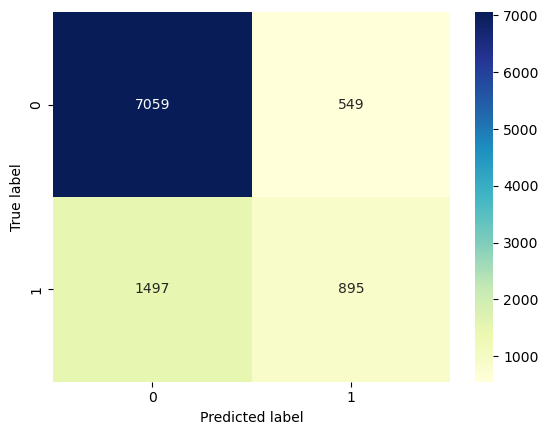

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train = hr_df.drop(['left'],axis=1)
y_train = hr_df['left']

rg = LogisticRegression()

rg.fit(X_train,y_train)
pred = rg.predict(X_train)

mat = confusion_matrix(y_train,pred)

# tn,fp,fn,tp = mat.ravel()
# print((tn,fp,fn,tp))

# print("acc:",accuracy_score(y_train,pred))

sns.heatmap(mat,annot=True,fmt='.20g',cmap="YlGnBu")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



<Axes: >

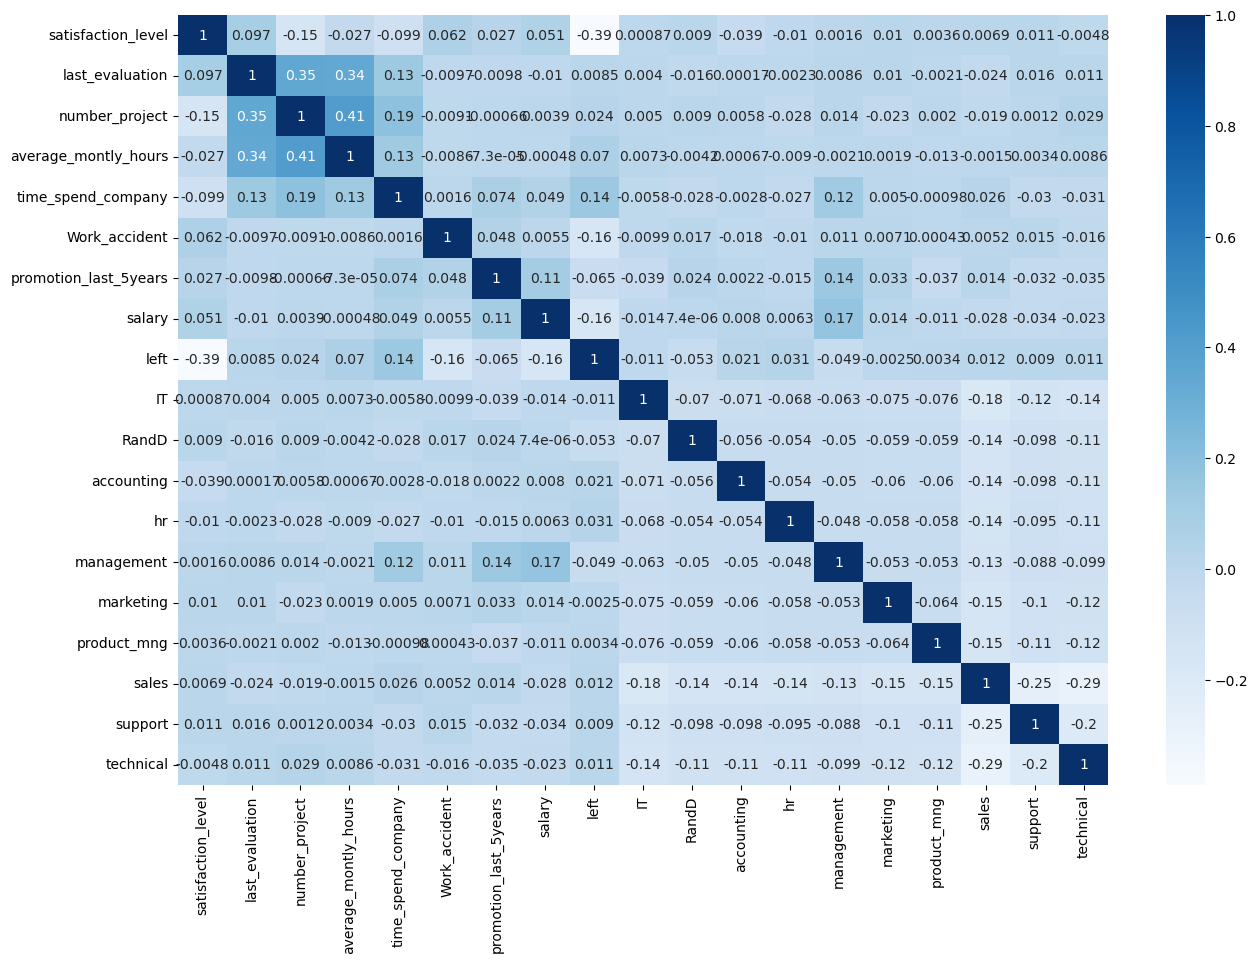

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(hr_df.corr(),annot=True,cmap="Blues")

- 由相關係數看出離職率跟職業沒有太大關係
- 在剩下的feature挑出相關係數較高（以大於0.01為界限），且我認為可能影響離職率的因素（近5年有沒升遷、每月平均工作時間）深入分析
- 每小時的薪水可能更有參考價值
- 資料分析來看 待在公司的時間 可能代表對公司的喜愛程度 因此我們把總工作時間 與每個月平均工作時間 scale到同一區間 在做差異得到新的feature

C:\Users\Terry\AppData\Local\Temp\ipykernel_22092\3078028212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_analytic_df['salary_per_hour'] = (hr_analytic_df['salary']*100+100) / hr_analytic_df['average_montly_hours']
C:\Users\Terry\AppData\Local\Temp\ipykernel_22092\3078028212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_analytic_df['job satisificaton'] = (hr_analytic_df['time_spend_company'] * 27+42) - hr_analytic_df['average_montly_hours']


<Figure size 2000x1500 with 0 Axes>

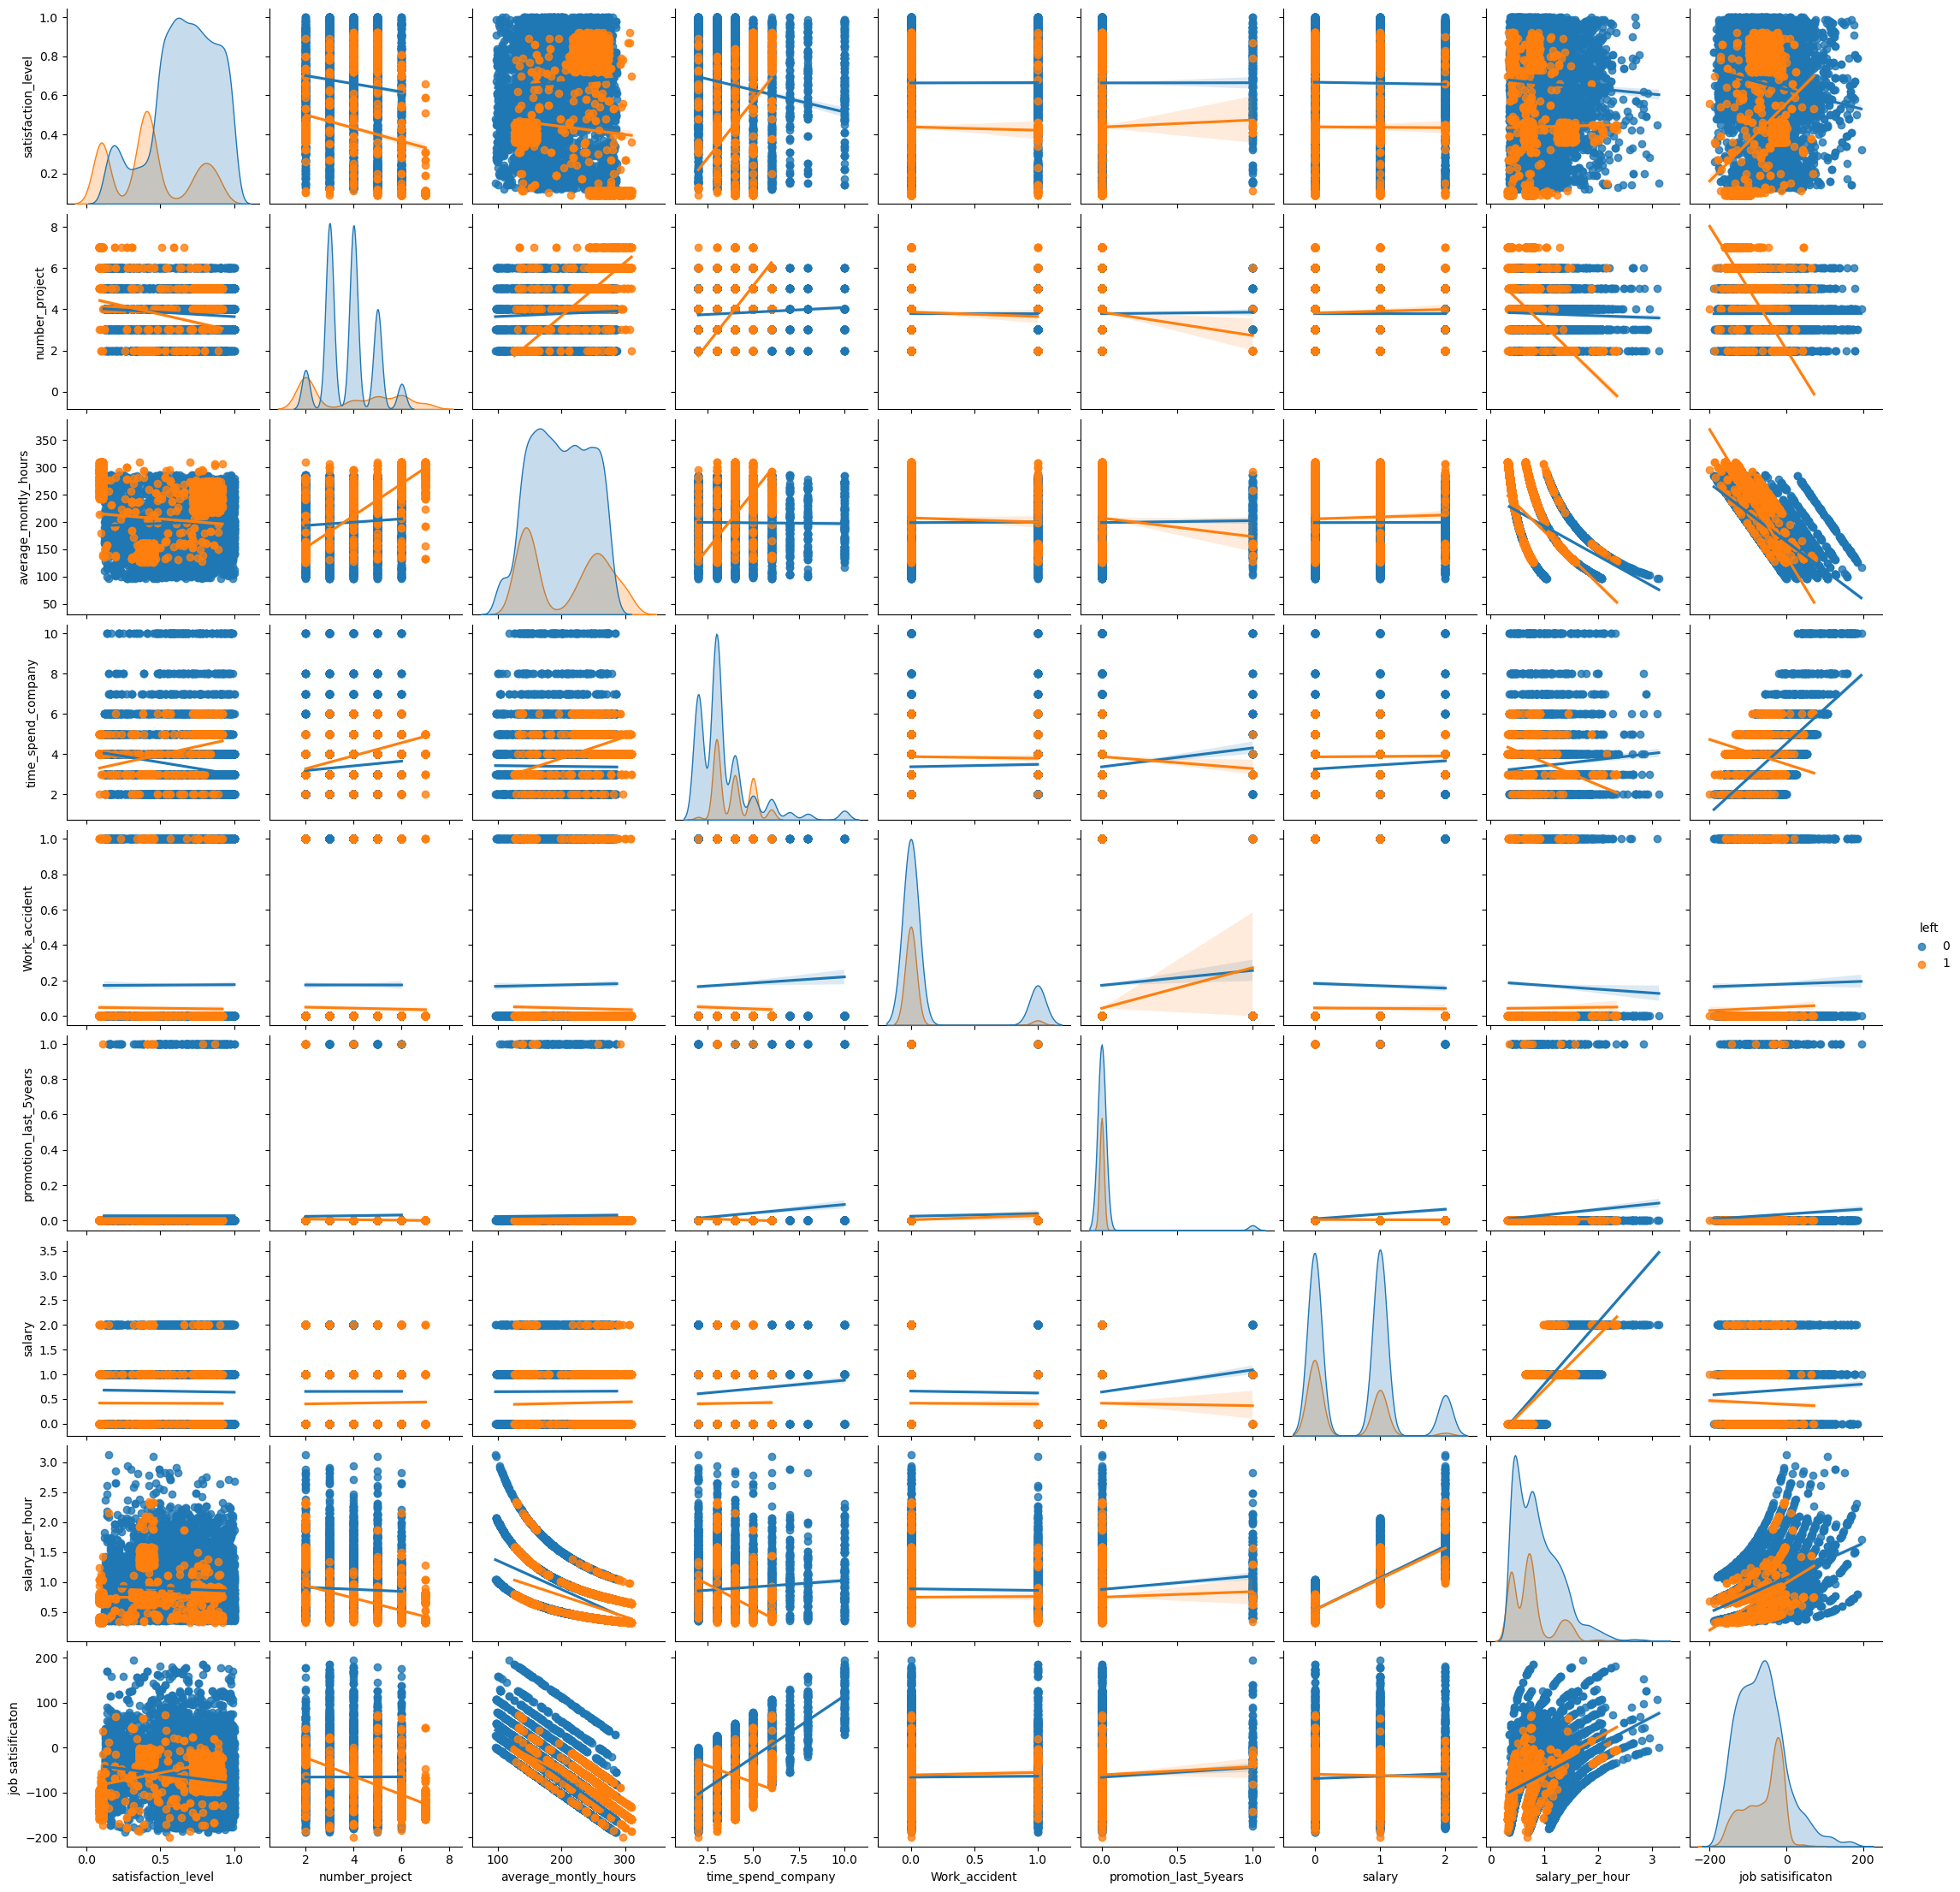

In [147]:
hr_analytic_df = hr_df[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary','left']]
hr_analytic_df['salary_per_hour'] = (hr_analytic_df['salary']*100+100) / hr_analytic_df['average_montly_hours'] 
#喜歡公司的程度
hr_analytic_df['job satisificaton'] = (hr_analytic_df['time_spend_company'] * 27+42) - hr_analytic_df['average_montly_hours']

plt.figure(figsize=(20,15))
sns.pairplot(data=hr_analytic_df, hue='left',diag_kind='kde',kind='reg')

(7110, 498, 1222, 1170)
acc: 0.828


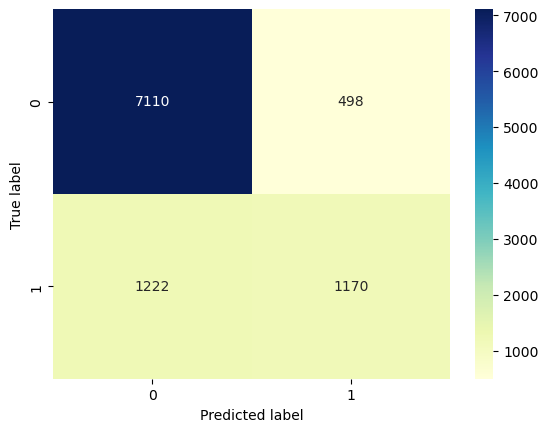

In [174]:
X_train = hr_analytic_df.drop(['left','average_montly_hours','salary','time_spend_company'],axis=1)
y_train = hr_analytic_df['left']

rg = LogisticRegression()

rg.fit(X_train,y_train)
pred = rg.predict(X_train)

mat = confusion_matrix(y_train,pred)

tn,fp,fn,tp = mat.ravel()
print((tn,fp,fn,tp))

print("acc:",accuracy_score(y_train,pred))

sns.heatmap(mat,annot=True,fmt='.20g',cmap="YlGnBu")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [175]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)

X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)


(7103, 505, 1207, 1185)
acc: 0.8288


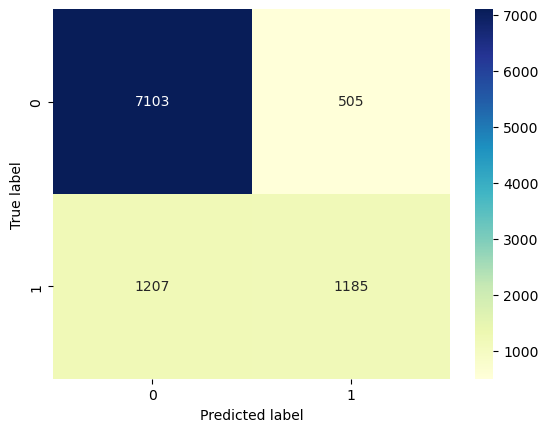

In [176]:
rg = LogisticRegression()

rg.fit(X_train_scaler,y_train)
pred = rg.predict(X_train_scaler)

mat = confusion_matrix(y_train,pred)

tn,fp,fn,tp = mat.ravel()
print((tn,fp,fn,tp))

print("acc:",accuracy_score(y_train,pred))

sns.heatmap(mat,annot=True,fmt='.20g',cmap="YlGnBu")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [180]:
test_hr_df = pd.read_csv('HW2_hr-analytics_test.csv')

categories_order = [['low', 'medium', 'high']]
ordinal_encoder = OrdinalEncoder(categories=categories_order)
test_hr_df['salary'] = ordinal_encoder.fit_transform(test_hr_df[['salary']])


test_hr_analytic_df = test_hr_df[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']]
test_hr_analytic_df['salary_per_hour'] = (test_hr_analytic_df['salary']*100+100) / test_hr_analytic_df['average_montly_hours'] 
test_hr_analytic_df['job satisificaton'] = (test_hr_analytic_df['time_spend_company'] * 27+42) - test_hr_analytic_df['average_montly_hours']

test_hr_analytic_df = test_hr_analytic_df.drop(['average_montly_hours','salary','time_spend_company'],axis=1)


C:\Users\Terry\AppData\Local\Temp\ipykernel_22092\4012402512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_hr_analytic_df['salary_per_hour'] = (test_hr_analytic_df['salary']*100+100) / test_hr_analytic_df['average_montly_hours']


In [181]:
test_hr_analytic_df = scaler.transform(test_hr_analytic_df)
hr_pred = rg.predict(test_hr_analytic_df)

hr_pred = pd.DataFrame({"left":hr_pred})
hr_pred.to_csv('HW2_hr-analytics_test_sol.csv',index=False)

d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
